In [1]:
import os
import sys
sys.path.insert(0, '/home/ramyasri/tabzilla/TabSurvey')
from tabzilla_datasets import TabularDataset
from pathlib import Path
from scipy.stats import gaussian_kde

In [2]:
dataset_names = os.listdir("/home/ramyasri/tabzilla/TabSurvey/datasets")
# print(len(dataset_names))

In [3]:
abs_path = '/home/ramyasri/tabzilla/TabSurvey/datasets/'


In [5]:
metadata = {}
for dataset_file in dataset_names:
    p = Path(abs_path+dataset_file).resolve()

    dataset = TabularDataset.read(p)
    metadata[dataset_file] = {"target_type": dataset.target_type,
                               "num_features": dataset.num_features,
                               "num_classes": dataset.num_classes,
                               "num_instances": dataset.num_instances     
                            }



In [7]:
print(metadata["openml__dionis__189355"])

{'target_type': 'classification', 'num_features': 60, 'num_classes': 355, 'num_instances': 416188}


In [8]:
count_binary = 0
count_class = 0
count_other = 0
for entity, keys in metadata.items():
    if keys["target_type"] == "classification":
        count_class += 1
    elif keys["target_type"] == "binary":
        count_binary += 1
    else:
        count_other += 1

print("Binary vs. Multi-classification: ", count_binary, count_class)
print("Other target types:", count_other)

Binary vs. Multi-classification:  56 52
Other target types: 6


In [9]:
import matplotlib.pyplot as plt
import numpy as np

13 12


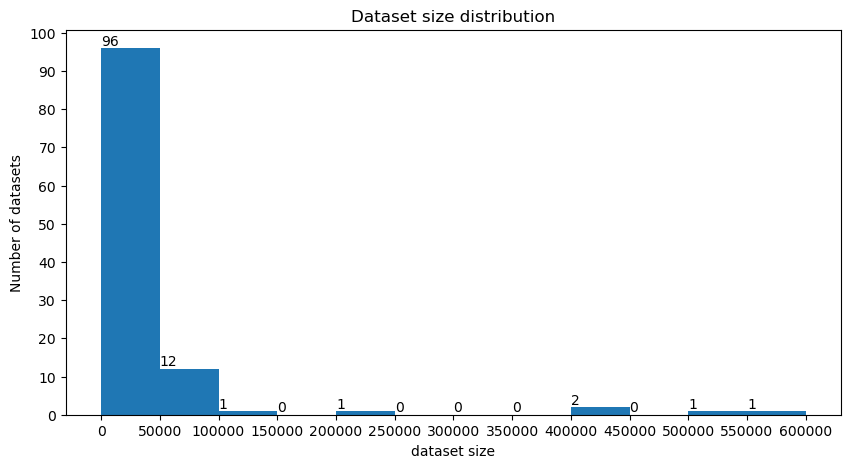

In [18]:

def addlabels(x,y):
   print(len(x),len(y))
   for i in range(len(y)):
      plt.text(x[i], y[i], int(y[i]), va = 'bottom')

num_instances_list = []

for entity, keys in metadata.items():
   num_instances_list.append(keys["num_instances"])

num_instances_list = np.array(num_instances_list)
fig, ax = plt.subplots(figsize=(10, 5))
w = 50000
count, bins, patches = ax.hist(num_instances_list, bins = np.arange(0, max(num_instances_list) + w, w))
ax.set_xticks(bins)
ax.set_yticks(np.arange(0, max(count)+ 10, 10))
ax.set_xlabel("dataset size")
ax.set_ylabel("Number of datasets")
plt.title("Dataset size distribution")
addlabels(bins, count)
plt.show()

In [59]:
# num_instances_list_sorted = np.sort(num_instances_list)
# x_scatter = np.arange(1, len(num_instances_list_sorted)+1, 1)
# xy = np.vstack([x_scatter, num_instances_list_sorted])
# z = gaussian_kde(xy)(xy)

# figure = plt.figure()
# ax = figure.add_axes([0, 0, 1, 1])
# ax.scatter(x_scatter, num_instances_list_sorted, c=z, s=20)
# ax.set_yscale("log")
# plt.show()

16 15


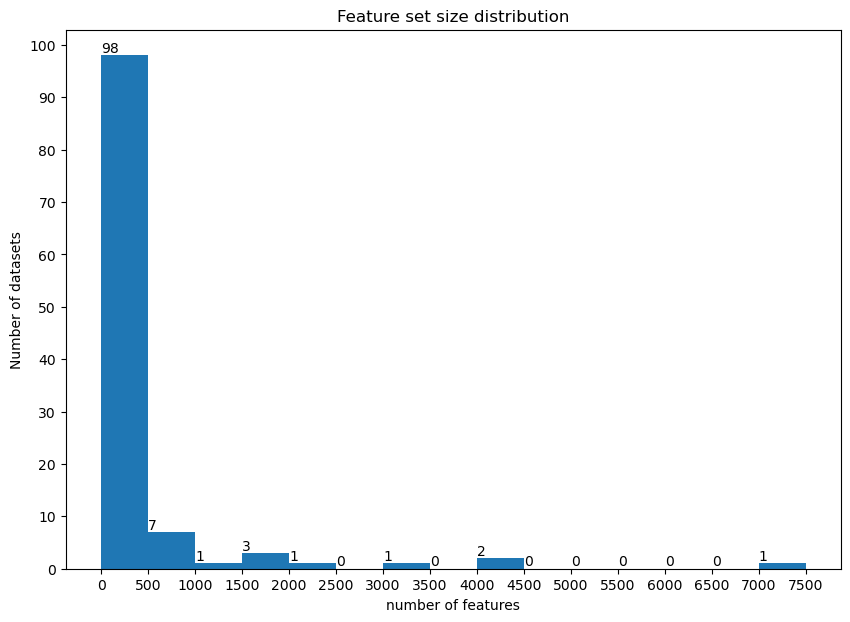

In [19]:
num_features_list = []

for entity, keys in metadata.items():
   num_features_list.append(keys["num_features"])

num_features_list = np.array(num_features_list)
fig, ax = plt.subplots(figsize=(10, 7))
w = 500
count, bins, patches = ax.hist(num_features_list, bins = np.arange(0, max(num_features_list) + w, w))
ax.set_xticks(bins)
ax.set_yticks(np.arange(0, max(count)+ 10, 10))
ax.set_xlabel("number of features")
ax.set_ylabel("Number of datasets")
plt.title("Feature set size distribution")
addlabels(bins, count)
plt.show()
